# Loading, merging, cleaning, and visualizing data

Welcome to a quick exercise for you to practice your pandas skills!

## You will learn to:

    . Loading your data
    . Merge data from different sources
    . Visualizing data
    . cleaning data
    
## 1- Packages

Loading the required packages for this session:

    . numpy
    
    . Pandas
    
    . matplotlib
    
    . seaborn
    
    . sklearn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

#for eliminating the unnecessary warnings:
import warnings
warnings.filterwarnings('ignore')

## 2- Loading, Merging two data sets 

### Note:

    . The address needs to be updated with the location of that data on your local computer
    . In python the locations need to be seperated with ('/') or ('\\'). Never use ('\')

In [3]:
data1 = pd.read_excel('D:/My Job/DataMining/For Test/Data/input/data1.xlsx')
xtra1 = pd.read_excel('D:/My Job/DataMining/For Test/Data/input/xtra1.xlsx')

### Check the head of dataframes


In [4]:
data1.head()

,Obs,AGEOTD,AGEAVG,TRADES,TOTBAL,HSATRT,CURSAT,BRTRDS,BROPEN,BROLDT,...,DWNPMT,NTTRIN,BSWHOL,BSRETL,MAKE,MODEL,MILEAG,NEWUSE,MNGPAY,CONTPR
0,1,-5,-5.00,0,-5,-5.00,-5,-5,-5,-5,...,2500.0,0.0,8025.0,11100.0,CHRYSLER,CONCORDE,80259,U,1720.00,10837.55
1,2,81,46.00,9,1567,0.00,0,0,-6,-6,...,1980.0,0.0,6400.0,9225.0,EAGLE,VISION,71337,U,2617.08,11290.00
2,3,-2,-2.00,0,-2,-2.00,-2,-2,-2,-2,...,700.9,100.0,1975.0,3750.0,GMC,JIMMY,122470,U,1386.67,3581.90
3,4,216,39.52,35,27657,37.14,1,3,1,23,...,1700.0,0.0,2550.0,4525.0,FORD,PROBE,130625,U,3574.99,6076.04
4,5,107,30.44,13,11467,23.08,0,0,-6,-6,...,6500.0,0.0,19351.0,21293.0,CHEVROLE,CAMARO,5748,U,2690.80,22879.58


In [5]:
xtra1.head()

,Obs,AGEOTD,RVOLDT,TROP24,OREVTR,RVTRDS,ORVTB0,HST79X,HST03X,TIME29,...,TIME49,CSORAT,T2924X,T3924X,T4924X,BRBAL1,REHSAT,ACCTNO,BKRETL,MODLYR
0,1,-5,-5,-5,-5,-5,-5,-5,-5,-5,...,-5,-5.0,-5,-5,-5,-5,-5,1004596,9925.0,1994
1,2,81,-6,4,-6,0,-6,9,0,4,...,4,-6.0,4,4,4,-6,-6,1004598,9050.0,1993
2,3,-2,-2,-2,-2,-2,-2,-2,-2,-2,...,-2,-2.0,-2,-2,-2,-2,-2,1004599,3165.0,1983
3,4,216,177,9,1,5,1,19,16,2,...,2,100.0,7,7,6,1,8,1004602,3975.0,1989
4,5,107,95,1,0,2,-6,9,4,8,...,8,-6.0,2,2,2,-6,0,1004603,21293.0,1998


### Lets check if we have any columns in both data set with the same name

In [6]:
data1.columns

Index(['Obs', 'AGEOTD', 'AGEAVG', 'TRADES', 'TOTBAL', 'HSATRT', 'CURSAT',
       'BRTRDS', 'BROPEN', 'BROLDT', 'BRHS2X', 'BRHS3X', 'BRHS4X', 'BRHS5X',
       'AUUTIL', 'CFTRDS', 'INQ012', 'PUBREC', 'BKTIME', 'CBTYPE', 'ACCTNO',
       'VAGE', 'VRESMOS', 'VJOBMOS', 'VDDASAV', 'BAD', 'GOOD', 'TERM',
       'DWNPMT', 'NTTRIN', 'BSWHOL', 'BSRETL', 'MAKE', 'MODEL', 'MILEAG',
       'NEWUSE', 'MNGPAY', 'CONTPR'],
      dtype='object')

In [7]:
xtra1.columns

Index(['Obs', 'AGEOTD', 'RVOLDT', 'TROP24', 'OREVTR', 'RVTRDS', 'ORVTB0',
       'HST79X', 'HST03X', 'TIME29', 'TIME39', 'TIME49', 'CSORAT', 'T2924X',
       'T3924X', 'T4924X', 'BRBAL1', 'REHSAT', 'ACCTNO', 'BKRETL', 'MODLYR'],
      dtype='object')

In [8]:
for i in data1.columns:
    if i in xtra1.columns:
        print(i)

Obs
AGEOTD
ACCTNO


### Merging data on Account number (ACCTNO)

    .Removing the xtra columns:
        .replicated columns and from data sets 
        .one of the 'GOOD' and 'BAD' column is required
    .merging two data sets
    .set the observation column ('Obs') as index

In [9]:
# df = data[0].merge(data[1].drop(['Obs','AGEOTD'],axis=1),on='ACCTNO')
df = data1.merge(xtra1,on='ACCTNO')
df.head()

,Obs_x,AGEOTD_x,AGEAVG,TRADES,TOTBAL,HSATRT,CURSAT,BRTRDS,BROPEN,BROLDT,...,TIME39,TIME49,CSORAT,T2924X,T3924X,T4924X,BRBAL1,REHSAT,BKRETL,MODLYR
0,1,-5,-5.00,0,-5,-5.00,-5,-5,-5,-5,...,-5,-5,-5.0,-5,-5,-5,-5,-5,9925.0,1994
1,2,81,46.00,9,1567,0.00,0,0,-6,-6,...,4,4,-6.0,4,4,4,-6,-6,9050.0,1993
2,3,-2,-2.00,0,-2,-2.00,-2,-2,-2,-2,...,-2,-2,-2.0,-2,-2,-2,-2,-2,3165.0,1983
3,4,216,39.52,35,27657,37.14,1,3,1,23,...,2,2,100.0,7,7,6,1,8,3975.0,1989
4,5,107,30.44,13,11467,23.08,0,0,-6,-6,...,8,8,-6.0,2,2,2,-6,0,21293.0,1998


In [10]:
df.drop(['Obs_x', 'AGEOTD_x','BAD'],axis=1,inplace=True)
df.head()

,AGEAVG,TRADES,TOTBAL,HSATRT,CURSAT,BRTRDS,BROPEN,BROLDT,BRHS2X,BRHS3X,...,TIME39,TIME49,CSORAT,T2924X,T3924X,T4924X,BRBAL1,REHSAT,BKRETL,MODLYR
0,-5.00,0,-5,-5.00,-5,-5,-5,-5,-5,-5,...,-5,-5,-5.0,-5,-5,-5,-5,-5,9925.0,1994
1,46.00,9,1567,0.00,0,0,-6,-6,-6,-6,...,4,4,-6.0,4,4,4,-6,-6,9050.0,1993
2,-2.00,0,-2,-2.00,-2,-2,-2,-2,-2,-2,...,-2,-2,-2.0,-2,-2,-2,-2,-2,3165.0,1983
3,39.52,35,27657,37.14,1,3,1,23,0,1,...,2,2,100.0,7,7,6,1,8,3975.0,1989
4,30.44,13,11467,23.08,0,0,-6,-6,-6,-6,...,8,8,-6.0,2,2,2,-6,0,21293.0,1998


In [11]:
df.set_index('Obs_y',inplace=True)
df.head()

,AGEAVG,TRADES,TOTBAL,HSATRT,CURSAT,BRTRDS,BROPEN,BROLDT,BRHS2X,BRHS3X,...,TIME39,TIME49,CSORAT,T2924X,T3924X,T4924X,BRBAL1,REHSAT,BKRETL,MODLYR
Obs_y,,,,,,,,,,,,,,,,,,,,,
1,-5.00,0,-5,-5.00,-5,-5,-5,-5,-5,-5,...,-5,-5,-5.0,-5,-5,-5,-5,-5,9925.0,1994
2,46.00,9,1567,0.00,0,0,-6,-6,-6,-6,...,4,4,-6.0,4,4,4,-6,-6,9050.0,1993
3,-2.00,0,-2,-2.00,-2,-2,-2,-2,-2,-2,...,-2,-2,-2.0,-2,-2,-2,-2,-2,3165.0,1983
4,39.52,35,27657,37.14,1,3,1,23,0,1,...,2,2,100.0,7,7,6,1,8,3975.0,1989
5,30.44,13,11467,23.08,0,0,-6,-6,-6,-6,...,8,8,-6.0,2,2,2,-6,0,21293.0,1998


### 3- Data Visualization

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14042 entries, 1 to 14042
Data columns (total 54 columns):
AGEAVG      14042 non-null float64
TRADES      14042 non-null int64
TOTBAL      14042 non-null int64
HSATRT      14042 non-null float64
CURSAT      14042 non-null int64
BRTRDS      14042 non-null int64
BROPEN      14042 non-null int64
BROLDT      14042 non-null int64
BRHS2X      14042 non-null int64
BRHS3X      14042 non-null int64
BRHS4X      14042 non-null int64
BRHS5X      14042 non-null int64
AUUTIL      14042 non-null float64
CFTRDS      14042 non-null int64
INQ012      14042 non-null int64
PUBREC      14042 non-null int64
BKTIME      14042 non-null int64
CBTYPE      14042 non-null int64
ACCTNO      14042 non-null int64
VAGE        14042 non-null object
VRESMOS     14042 non-null int64
VJOBMOS     14042 non-null int64
VDDASAV     14042 non-null object
GOOD        14042 non-null int64
TERM        14042 non-null int64
DWNPMT      14042 non-null float64
NTTRIN      14042 non-n

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AGEAVG,14042.0,2.771488e+01,26.908365,-5.00,7.33,24.00,40.000,311.00
TRADES,14042.0,7.994588e+00,7.834998,0.00,2.00,6.00,11.000,101.00
TOTBAL,14042.0,1.317810e+04,28337.939413,-5.00,545.25,3713.00,13200.000,688869.00
HSATRT,14042.0,1.484629e+01,21.861330,-5.00,0.00,0.00,25.000,100.00
CURSAT,14042.0,4.453782e-01,1.973484,-5.00,0.00,0.00,1.000,27.00
BRTRDS,14042.0,8.435408e-01,2.366066,-5.00,0.00,0.00,2.000,25.00
BROPEN,14042.0,-2.643641e+00,3.236371,-6.00,-6.00,-3.00,0.000,10.00
BROLDT,14042.0,2.427354e+01,48.325992,-6.00,-6.00,-3.00,42.000,593.00
BRHS2X,14042.0,-2.894246e+00,2.911509,-6.00,-6.00,-3.00,0.000,5.00
BRHS3X,14042.0,-2.906708e+00,2.895416,-6.00,-6.00,-3.00,0.000,5.00


In [14]:
# sns.pairplot(df,hue='GOOD')

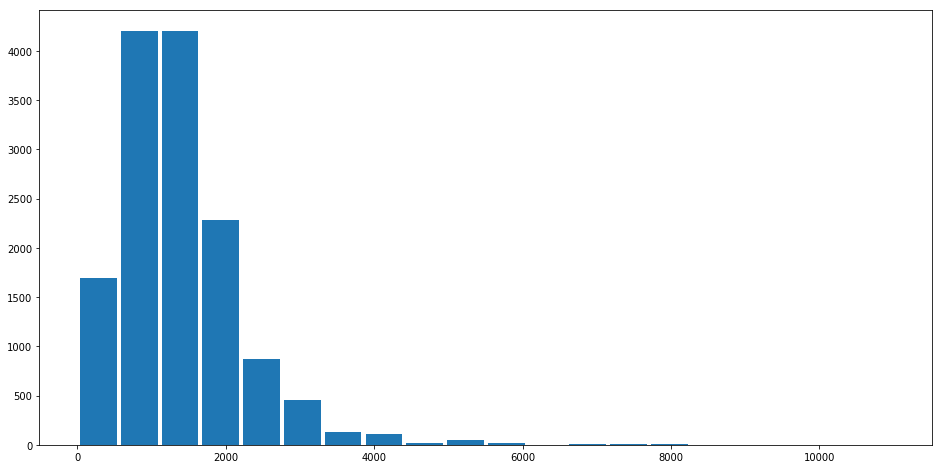

In [15]:
plt.figure(figsize=(16,8))
plt.hist(df['DWNPMT'],bins=20 ,rwidth=0.9);


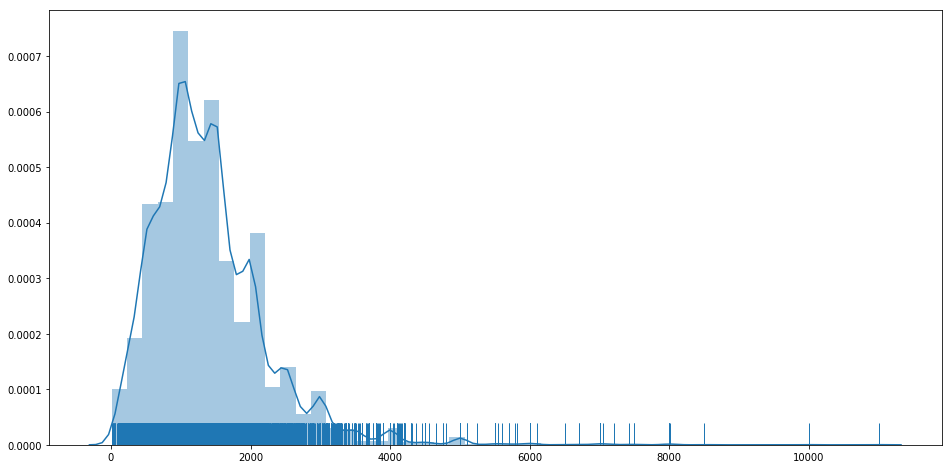

In [16]:
plt.figure(figsize=(16,8))
sns.distplot(np.float64(df['DWNPMT']),rug=True);

### 4- Save the merged data 

    The finall data frame will be used the the other sessions 

In [72]:
df.to_excel('../Data/df.xlsx')